<a href="https://colab.research.google.com/github/ahmadalmasri270/training-projects/blob/main/Regression_Metrics_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment:
The ultimate goal of this task is to predict the price based on the available features using a linear regression model.

All of the features and the target are continuous variables.

For now, you do not need to do any cleaning to this data set. You can use it "as is."

An important exploration step is to determine if there are any moderate or strong correlations in your variables.

1. Make a heatmap of the correlations. Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price. We will limit our analysis to these three features.

2. Select columns for your feature matrix (X) and select price for your target vector (y).

3. Split your data into train and test groups. Please use random number 42 for consistency!

4. Instantiate your model and fit it on the training set.

5. Evaluate your model performance using R^2 on the training set and on the test set. Is there a difference between model performance on the training data vs the test data?

6. Evaluate your model using mean absolute error (MAE).

7. Evaluate your model using mean squared error (MSE).

8. Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector. In this case 1,000 of dollars.

#1.Load the Data.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Boston_Housing_from_Sklearn.csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [26]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
set_config(display='diagram')

In [5]:
# Make copy of the Data set
df_ml = df.copy()

##3.check for Duplicated and missing value

In [6]:
df_ml.duplicated().sum()

0

In [7]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


#4.Creating a Heatmap

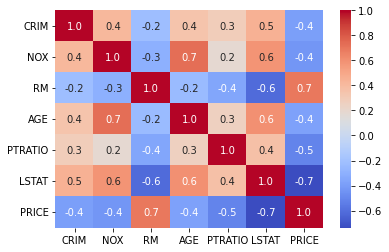

In [8]:
#create heat map
corr = df_ml.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1f')

#5.Splitting the Data

In [9]:
#create target and features
X = df_ml.drop(columns=['PRICE'])
y = df_ml['PRICE']

In [10]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#6.Creating the Model

In [11]:
#create linear regression model
reg_model = LinearRegression()
#fit training data on model
reg_model.fit(X_train, y_train)

LinearRegression()

#7.Make Predictions

In [12]:
#use model to predict 
train_p = reg_model.predict(X_train)
test_p = reg_model.predict(X_test )

Measuring model performance - using functions from metrics

In [13]:
#print predictions
print(f'Training Predictions\n{train_p}\n')
print(f'Testing Predictions\n{test_p}\n')

Training Predictions
[32.82681739 22.81651124 38.37794525 11.34324634 26.24547189 20.26823671
 20.65258914 11.07740538 21.85015391 21.88399628 32.82675611 30.58450812
 17.58676265 18.47398996 29.73764005 23.33008215 12.8199877   5.78933432
 24.60114479 23.21183082 17.22557309 15.16199473 40.28253819 19.44488508
 18.2291405  27.60884512 23.29520424 21.2167599  21.33352584 15.15140316
 23.96675698 31.20874698  7.2287095  22.68072907 19.2071432  19.82476015
 25.37452689 24.61976763 23.36971148 41.38980851 17.47494809 17.81758111
 22.14362853 19.78407421 22.77137959 21.77024419 34.16091102 20.83339847
 19.97605062 24.90617336 28.90914393 34.5491698  26.72498375  9.2690051
  1.6840684  10.55667755 17.36623597 30.14460148 29.19929371 20.25439983
  2.5487798  28.32977199 22.31517283 19.7556521  27.37155383 17.39358883
 16.41178081 10.07992992 30.87754153 26.76685452 19.56084213 19.8796505
 15.98168404 26.22350233 19.48138828 28.40432046 30.10032717 24.58509174
 24.63658953 26.94636338 41.4890

Finding R2

In [14]:
#find R2
train_r2 = r2_score(y_train, train_p)
test_r2 = r2_score(y_test, test_p)
#print R2
print(f'Training R2 - {train_r2}')
print(f'Testing R2 - {test_r2}')

Training R2 - 0.6954015699310794
Testing R2 - 0.6356314088765054


###____I think there is not a big difference between the training data performance and the testing data performance.___

Finding MAE

In [15]:
#find MAE
train_MAE = mean_absolute_error(y_train, train_p)
test_MAE = mean_absolute_error(y_test, test_p)
#print MAE
print(f'Training MAE - {train_MAE}')
print(f'Testing MAE - {test_MAE}')

Training MAE - 3.669619378415505
Testing MAE - 3.335742737286131


###___On average the training predictions are different than the actual and the by 3669 USD , On average the Testing predictions are different than the actual and the by 3335 USD___

Finding MSE

In [16]:
#find MSE
train_MSE = mean_squared_error(y_train, train_p)
test_MSE = mean_squared_error(y_test, test_p)
#print MSE
print(f'Training MSE - {train_MSE}')
print(f'Testing MSE - {test_MSE}')

Training MSE - 27.012316202586668
Testing MSE - 25.51569167371523


These metrics are squared so they are difficult to interpret

Finding RMSE

In [17]:
#find RMSE
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)
#print RMSE
print(f'Training RMSE - {train_RMSE}')
print(f'Testing RMSE - {test_RMSE}')

Training RMSE - 5.197337414733305
Testing RMSE - 5.051305937449763


he average in training and testing data errors is of around 5000 USD

#Ensemble Trees Exercise (Core)

Your task is to create the best possible model to predict house prices.

1. Try a Decision Tree, Bagged Tree, and Random Forest.

2. Tune each model to optimize performance on the test set.

3. Evaluate your best model using multiple regression metrics.

4. Explain in a text cell how your model will perform if deployed by referring to the metrics.

##Creating Trees

##Decision Tree Regressor

In [18]:
#create decision treee regressor
dec_tree = DecisionTreeRegressor(random_state = 42)

In [19]:
#fit data
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
#make predictions
train_p = dec_tree.predict(X_train)
test_p = dec_tree.predict(X_test)

In [21]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.6193230918136841


The decision tree have the top score but the test score very low. The data was overfitted We need to change the parameters of the tree to get a better score.

In [22]:
#get parameters
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [23]:
#get depth
dec_tree.get_depth()

20

we need to lower depths to make the best model.

In [24]:
#iterate through all depths and find the highest test score
depths = list(range(2, 20))
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  dec_tree.fit(X_train, y_train)
  train_score = dec_tree.score(X_train, y_train)
  test_score = dec_tree.score(X_test, y_test)
  scores.loc[depth, 'Train Score'] = train_score
  scores.loc[depth, 'Test Score'] = test_score
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
print(sorted_scores.head())

   Test Score Train Score
7    0.846377    0.958517
10    0.84601    0.986796
11   0.829736      0.9911
12   0.827102    0.995358
6    0.825985    0.942742


##Bagged Tree

In [27]:
#create bagged tree
bagreg = BaggingRegressor(random_state = 42)

In [28]:
#fit model
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [29]:
#make predictions
train_p = bagreg.predict(X_train)
test_p = bagreg.predict(X_test)

In [30]:
#get parameters
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [31]:
#get scores
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9606756023782893
0.8204208271364619


The test score is higher in this model, but the train score is still high, meaning that the model is still overfitted.

In [32]:
#iterate through estimators to find best test score
estimators = [10, 20, 30, 40, 50, 100]
scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])
for num_estimators in estimators:
   bag_reg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_reg.fit(X_train, y_train)
   train_score = bag_reg.score(X_train, y_train)
   test_score = bag_reg.score(X_test, y_test)
   scores.loc[num_estimators, 'Train Score'] = train_score
   scores.loc[num_estimators, 'Test Score'] = test_score
scores = scores.sort_values(by='Test Score', ascending=False)
scores

,Train Score,Test Score
40,0.97395,0.834365
50,0.975185,0.83391
100,0.977246,0.833051
20,0.9701,0.831147
30,0.973401,0.830604
10,0.960676,0.820421


the training score is higher , but the test score is less 

##Random Forest

In [33]:
#create random forest
rf = RandomForestRegressor(random_state = 42)

In [34]:
# get parameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [35]:
#fit data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
#make predictions
train_p = rf.predict(X_train)
test_p = rf.predict(X_test)

In [37]:
#get scores
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9771342521069045
0.8338530730048258


In [38]:
#get depths
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

23

In [39]:
#iterate through depths to find best test score
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
17,0.834214,0.974366
10,0.830842,0.973501
16,0.829623,0.975839
12,0.829606,0.974704
9,0.829458,0.971082


Bagged Tree is the best Model 

In [40]:
#create best random forest
rf = RandomForestRegressor(random_state = 42, max_depth=5)

#Get Metrics

In [42]:
#find MAE
train_MAE = mean_absolute_error(y_train, train_p)
test_MAE = mean_absolute_error(y_test, test_p)
#print MAE
print(f'Training MAE - {train_MAE}')
print(f'Testing MAE - {test_MAE}\n')

#find MSE
train_MSE = mean_squared_error(y_train, train_p)
test_MSE = mean_squared_error(y_test, test_p)
#print MSE
print(f'Training MSE - {train_MSE}')
print(f'Testing MSE - {test_MSE}\n')

#find RMSE
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)
#print RMSE
print(f'Training RMSE - {train_RMSE}')
print(f'Testing RMSE - {test_RMSE}\n')

Training MAE - 0.9535461741424778
Testing MAE - 2.207858267716535

Training MSE - 2.027774116094985
Testing MSE - 11.634794724409444

Training RMSE - 1.4239993385163439
Testing RMSE - 3.410981489895459

